#### Diabetes Classification with Logistic Regression

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### EDA (Exploratory Data Analysis)

In [6]:
df = pd.read_csv("diabetes-dataset.csv")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


We can see we only have numeric columns (int and float) and we do not have null values.

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

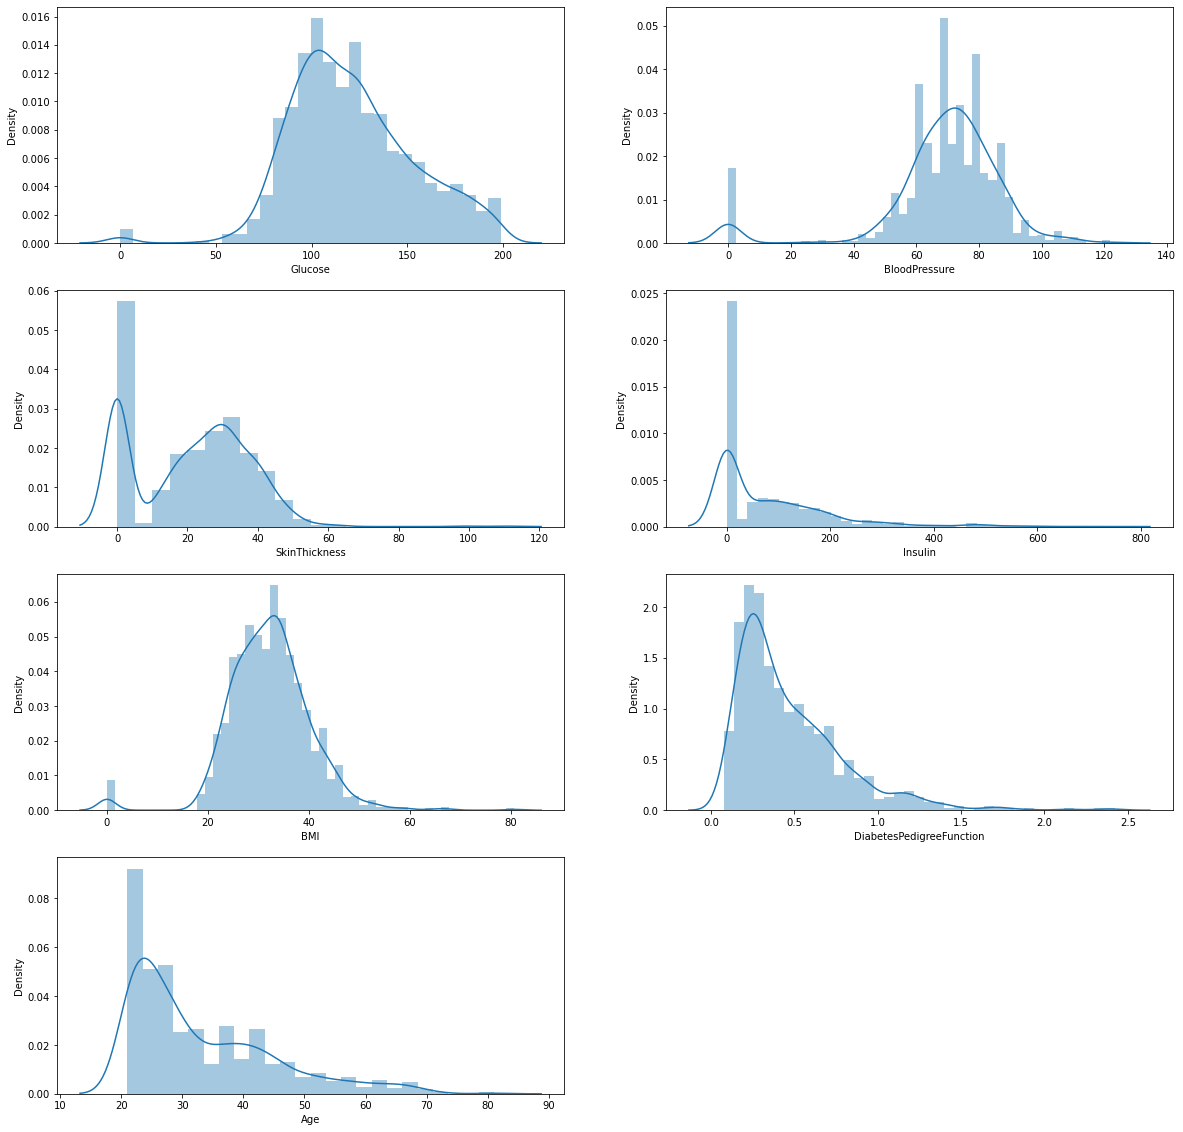

In [14]:
fig=plt.figure(figsize=(20,20))
for i,col in enumerate(df.drop(['Pregnancies','Outcome'],axis=1)):
    ax=fig.add_subplot(4,2,i+1)
    sns.distplot(df[col])

we can see that in Age, Insulin, DiabetesPedigreeFunction and SkinThickness most of the values are to the left, so our plots are right skewed; 
we can try to standardize our values with sklearn.preprocessing.scale.

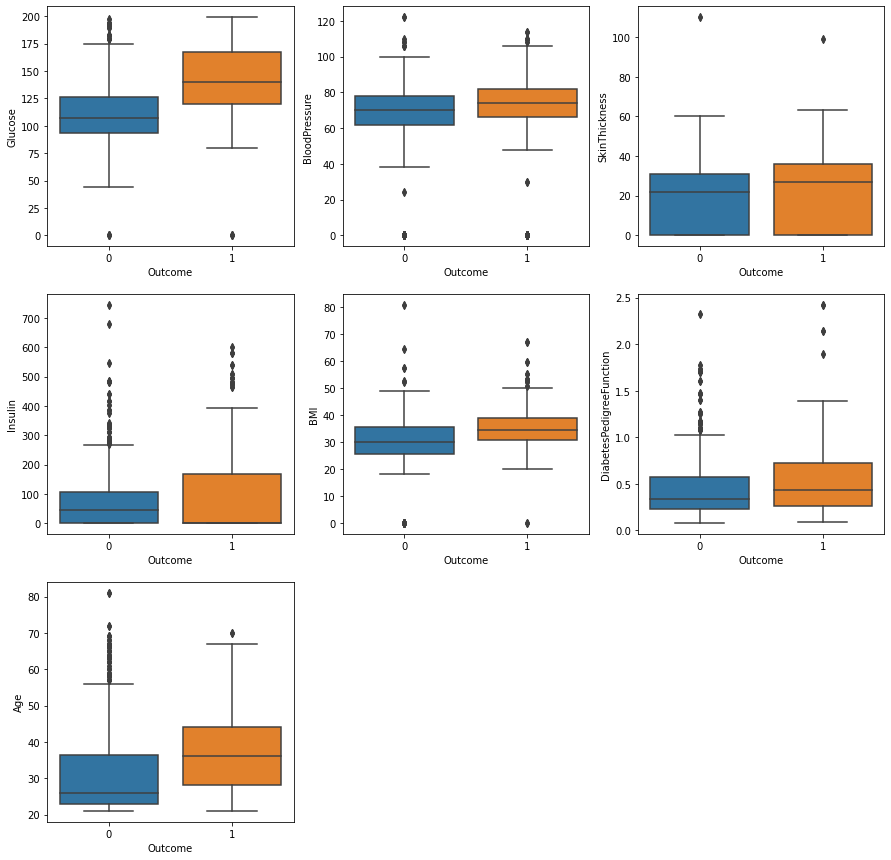

In [15]:
fig=plt.figure(figsize=(15,15))
for i,col in enumerate(df.drop(['Pregnancies','Outcome'],axis=1)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(y=df[col],x=df['Outcome'])

#### Preprocessing

In [16]:
from sklearn import preprocessing

In [17]:
df[['Pregnancies', 'SkinThickness', 'Insulin', 'BMI']] = preprocessing.scale(df[['Pregnancies', 'SkinThickness', 
                                                                                 'Insulin', 'BMI']])
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,df.mean(axis=0))
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2.000000e+03,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000
mean,-6.927792e-17,121.970186,72.257047,9.869883e-17,1.065016e-16,2.212952e-16,0.470930,33.090500,0.342000
std,1.000250e+00,30.533180,11.968614,1.000250e+00,1.000250e+00,1.000250e+00,0.323553,11.786423,0.474498
min,-1.120495e+00,44.000000,24.000000,-1.300374e+00,-7.220155e-01,-3.951097e+00,0.078000,21.000000,0.000000
25%,-8.179445e-01,99.000000,64.000000,-1.300374e+00,-7.220155e-01,-5.913207e-01,0.244000,24.000000,0.000000
50%,-2.128441e-01,118.000000,72.000000,1.282671e-01,-3.621503e-01,1.313228e-02,0.376000,29.000000,0.000000
75%,6.948066e-01,141.000000,80.000000,6.873005e-01,4.475463e-01,5.654243e-01,0.624000,40.000000,1.000000
max,4.022859e+00,199.000000,122.000000,5.532257e+00,5.971477e+00,5.941067e+00,2.420000,81.000000,1.000000


In [18]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(744, 9)

In [22]:
train, test = train_test_split(df)
X = train.iloc[:, 0:8]
y = train.iloc[:, 8:9]
X_test = test.iloc[:, 0:8]
y_test = test.iloc[:, 8:9]

In [23]:
clf = LogisticRegression(solver="liblinear", penalty="l1").fit(X, np.ravel(y))
y_pred = clf.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [25]:
cm = confusion_matrix(y_test, y_pred)
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.7580645161290323


array([[114,  17],
       [ 28,  27]], dtype=int64)

In [26]:
from sklearn.metrics import plot_confusion_matrix

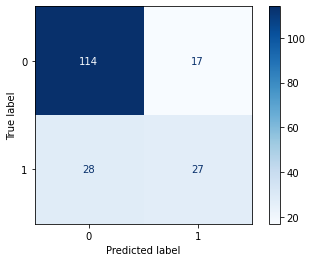

In [27]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [28]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5454545454545455

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(X_train, y_train)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
lr.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [38]:
lr.score(X_train, y_train)

0.7825112107623319

In [39]:
lr.score(X_test, y_test)

0.7589285714285714

In [40]:
lr.predict_proba(X_test)[:,1]

array([0.92249662, 0.19176821, 0.73897377, 0.79315781, 0.74385393,
       0.36520448, 0.17365288, 0.7276314 , 0.41873462, 0.03269447,
       0.50450941, 0.0715555 , 0.2452218 , 0.08382499, 0.04005803,
       0.36346967, 0.02443863, 0.03604871, 0.15619153, 0.25423877,
       0.11432473, 0.07362026, 0.74622756, 0.07622725, 0.37296658,
       0.12181531, 0.01140111, 0.04341779, 0.33764645, 0.23114246,
       0.13687177, 0.29061573, 0.38205213, 0.04206353, 0.44868794,
       0.09666088, 0.16109089, 0.01533044, 0.49396783, 0.64179442,
       0.35482101, 0.87389387, 0.17453065, 0.08304339, 0.12723977,
       0.10871266, 0.4709597 , 0.60856792, 0.69094651, 0.09265241,
       0.98276863, 0.56530327, 0.26058603, 0.23832348, 0.12136574,
       0.16693975, 0.10836453, 0.04593265, 0.22102637, 0.86588951,
       0.01696063, 0.00706639, 0.32365653, 0.06888245, 0.63423205,
       0.19618551, 0.12736507, 0.46456838, 0.93099032, 0.60106797,
       0.05386401, 0.17606525, 0.33472176, 0.42822109, 0.30106

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
gnb = GaussianNB()

In [42]:
gnb.fit(X_train, y_train).predict(X_test)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [43]:
gnb.score(X_test, y_test)

0.7678571428571429